<a href="https://colab.research.google.com/github/fbsaif007/fbsaif007/blob/main/LSTM_for_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing dataset
### I have selected a simple data from a github, and the reason for selecting this data was so that I did not have to do any cleaning and focus on the machine learning model (LSTM)


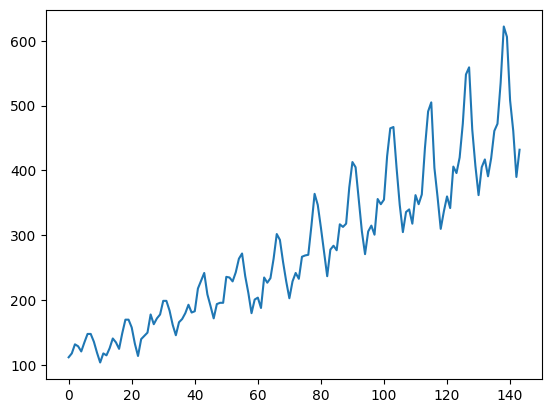

In [4]:
import pandas
import matplotlib.pyplot as plt
dataset = pandas.read_csv('airline-passengers.csv', usecols=[1], engine='python')
plt.plot(dataset)
plt.show()

# Importing useful Libraries
### before starting our work I will import all the relevant libraries

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

# Let us fix random seed for reproducibility


In [6]:
tf.random.set_seed(7)

# Preprocessing the dataset

In [7]:
dataset = dataset.values
dataset = dataset.astype('float32')

# Normalizing data
### Max-min scales is used since it is more suitable for this data
### Alternatively we could have used a Z score scaling

In [8]:
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

# Splitting the data into test and train set

In [9]:
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

96 48


# We will define a function to create a new dataset


In [10]:
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)

# Now that we have defined the function we will create a dataset for the train and test set data. Reshape into X=t and y=t+1

In [11]:
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

# Reshaping the data to fit [samples, time steps, features]

In [12]:
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

# Create and fit the LSTM
##### The network has a visible layer with 1 input, a hidden layer with 4 LSTM blocks or neurons, and an output layer that makes a single value prediction. The default sigmoid activation function is used for the LSTM blocks. The network is trained for 100 epochs, and a batch size of 1 is used.

In [13]:
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
94/94 - 2s - loss: 0.0419 - 2s/epoch - 26ms/step
Epoch 2/100
94/94 - 0s - loss: 0.0209 - 182ms/epoch - 2ms/step
Epoch 3/100
94/94 - 0s - loss: 0.0150 - 176ms/epoch - 2ms/step
Epoch 4/100
94/94 - 0s - loss: 0.0136 - 178ms/epoch - 2ms/step
Epoch 5/100
94/94 - 0s - loss: 0.0127 - 168ms/epoch - 2ms/step
Epoch 6/100
94/94 - 0s - loss: 0.0117 - 174ms/epoch - 2ms/step
Epoch 7/100
94/94 - 0s - loss: 0.0108 - 173ms/epoch - 2ms/step
Epoch 8/100
94/94 - 0s - loss: 0.0099 - 178ms/epoch - 2ms/step
Epoch 9/100
94/94 - 0s - loss: 0.0091 - 221ms/epoch - 2ms/step
Epoch 10/100
94/94 - 0s - loss: 0.0081 - 197ms/epoch - 2ms/step
Epoch 11/100
94/94 - 0s - loss: 0.0073 - 201ms/epoch - 2ms/step
Epoch 12/100
94/94 - 0s - loss: 0.0064 - 180ms/epoch - 2ms/step
Epoch 13/100
94/94 - 0s - loss: 0.0057 - 198ms/epoch - 2ms/step
Epoch 14/100
94/94 - 0s - loss: 0.0050 - 196ms/epoch - 2ms/step
Epoch 15/100
94/94 - 0s - loss: 0.0043 - 197ms/epoch - 2ms/step
Epoch 16/100
94/94 - 0s - loss: 0.0039 - 190ms/epoc

### In this step we will make predictions, invert the predictions and calculate the root mean squared error

In [14]:
# making the predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# inverting the predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# root mean squared error
trainScore = np.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

2/2 [==============================] - 0s 6ms/step
Train Score: 22.75 RMSE
Test Score: 48.34 RMSE


### We will process the data to fit into the original data

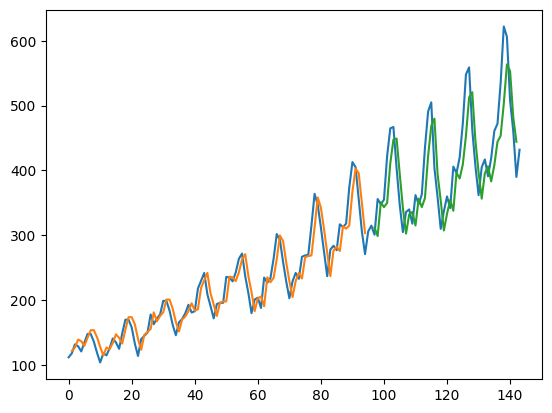

In [15]:
# shift train for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot original and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()